<a href="https://colab.research.google.com/github/Dodekaphonia/MicaSense/blob/master/Histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This tutorial aims to demonstrate operations with histogram stretchins and, in parralel, to make a map of algae blooming in the Black Sea


# Histogram experimnets

In [0]:
import os
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
from google.colab import files

In [0]:
from cv2 import equalizeHist

In [0]:
# This chunk is for image downloading from disk. Download Sentinel-2 B2 (Blue Channel) 
uploaded = files.upload() 
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

uploaded.keys()

Saving 2019-08-23, Sentinel-2B L1C, B02.tiff to 2019-08-23, Sentinel-2B L1C, B02 (1).tiff
User uploaded file "2019-08-23, Sentinel-2B L1C, B02.tiff" with length 5200365 bytes


dict_keys(['2019-08-23, Sentinel-2B L1C, B02.tiff'])

In [0]:
#Copy image name between '' to work with it  
b2 = cv2.imread('2019-08-23, Sentinel-2B L1C, B02.tiff', -1)

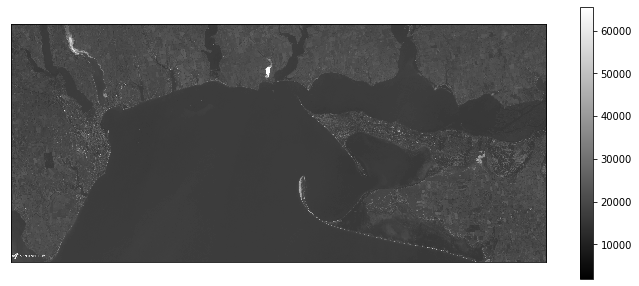

In [0]:
#Visualise image
plt.figure( figsize= (12,5))
plt.imshow(b2, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()

Image is a numpy array (matrix), so all the matrix operation could be applied to it

In [0]:
type(b2)

numpy.ndarray

In [0]:
b2.shape

(1303, 2935)

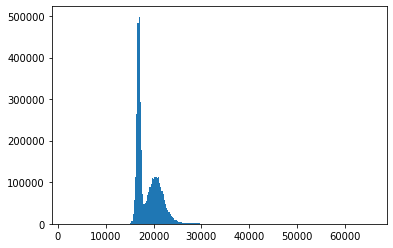

In [0]:
#This is source image histogram. Notice the variance and peaks
plt.hist(b2.ravel(), bins = 255)
plt.show()

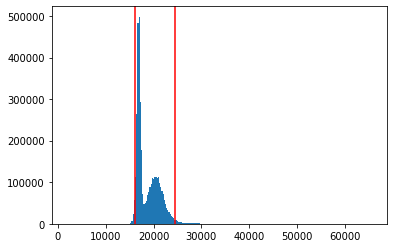

In [0]:
#Draw a histogram and image percentiles
plt.hist(b2.ravel(), bins = 255)
plt.axvline(np.percentile(b2, 2), c = 'red')
plt.axvline(np.percentile(b2, 98), c = 'red')
plt.show()

In [0]:
#Stretch image between 2 percentiles
b2_linear = b2.copy()
b2_linear[b2<np.percentile(b2, 2)] = np.percentile(b2, 2)
b2_linear[b2>np.percentile(b2, 98)] = np.percentile(b2, 98)

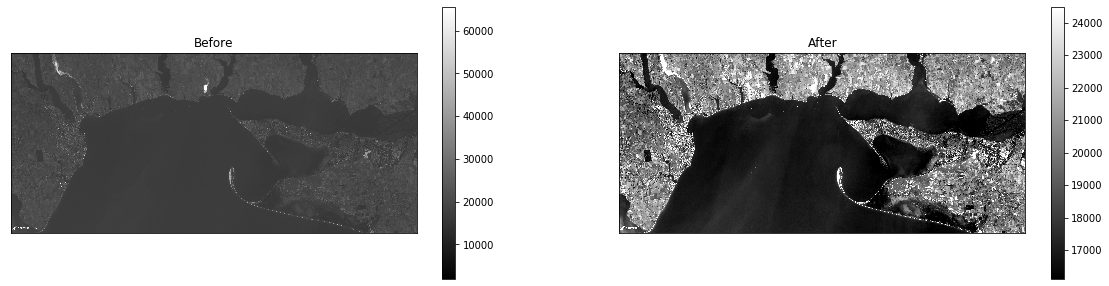

In [0]:
#Draw image between 2% percentintiles
plt.figure( figsize= (20,5))
plt.subplot(1,2,1)
plt.title('Before')
plt.imshow(b2, vmin = np.min(b2), vmax = np.max(b2), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.subplot(1,2,2)
plt.title('After')
plt.imshow(b2_linear, vmin = np.min(b2_linear), vmax = np.max(b2_linear), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()

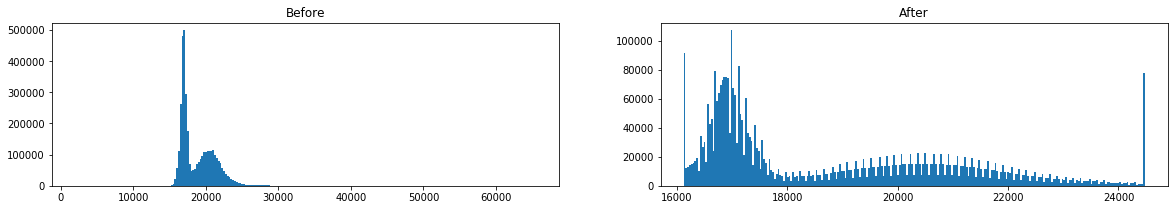

In [0]:
#Draw image between 2% percentintiles
plt.figure( figsize= (20,3))
plt.subplot(1,2,1)
plt.title('Before')
plt.hist(b2.ravel(), bins= 255)

plt.subplot(1,2,2)
plt.title('After')
plt.hist(b2_linear.ravel(), bins= 255)
plt.show()

Image looks much clearler, but we still can see only slightly brightness variances on the water surface. Lets make it brighter

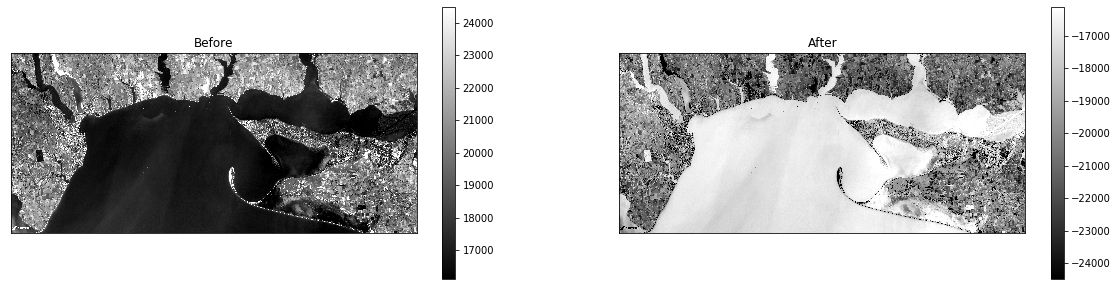

In [0]:
#Experiment to see more algae details
#Remember, that y = ax+b, where a influence the contrast and b - the overall brightness
plt.figure( figsize= (20,5))
plt.subplot(1,2,1)
plt.title('Before')
plt.imshow(b2_linear, vmin = np.min(b2_linear), vmax = np.max(b2_linear), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.subplot(1,2,2)
plt.title('After')
plt.imshow(b2_linear*1.1, vmin = np.min(b2_linear), vmax = np.max(b2_linear), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()

May be  **Histogram Equalisation** will help?

In [0]:
#First problem - Equalisation is applied only to 8 bit images in OpenCV, so
b2_8bit = (b2/256).astype('uint8')

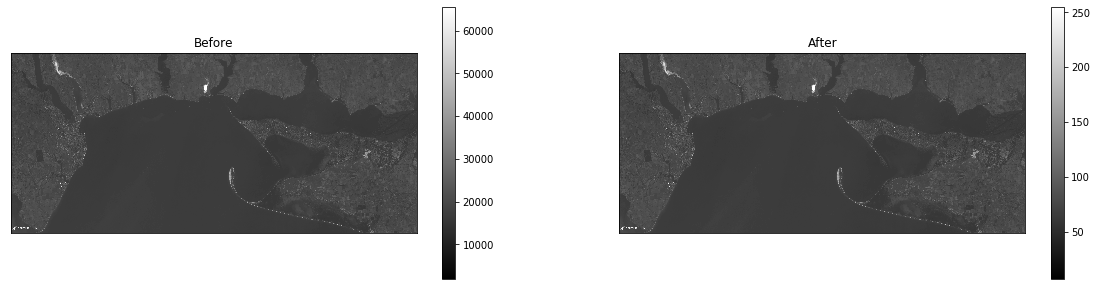

In [0]:
#See, images looks the same, but colorbars are different
plt.figure( figsize= (20,5))
plt.subplot(1,2,1)
plt.title('Before')
plt.imshow(b2,  cmap='gray')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.subplot(1,2,2)
plt.title('After')
plt.imshow(b2_8bit,  cmap='gray')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()

In [0]:
b2_equal = cv2.equalizeHist(b2_8bit)

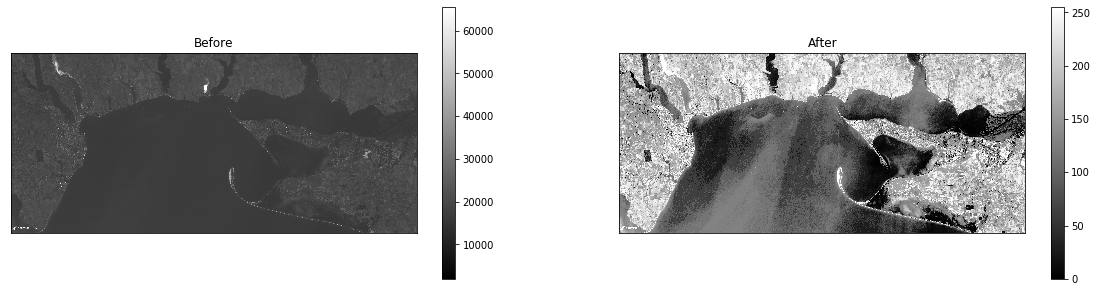

In [0]:
#See, images looks the same, but colorbars are different
plt.figure( figsize= (20,5))
plt.subplot(1,2,1)
plt.title('Before')
plt.imshow(b2_8bit,  cmap='gray')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.subplot(1,2,2)
plt.title('After')
plt.imshow(b2_equal,  cmap='gray')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()

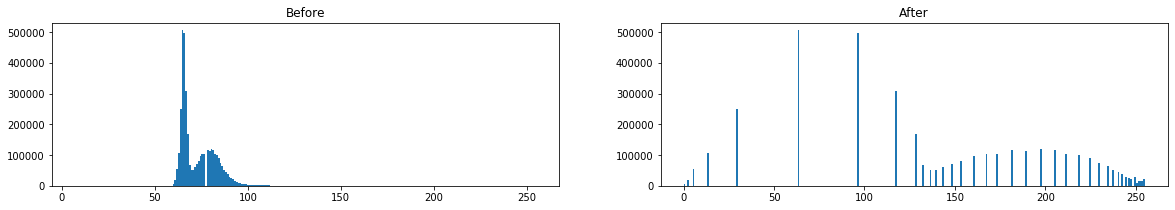

In [0]:
#Draw image between 2% percentintiles
plt.figure( figsize= (20,3))
plt.subplot(1,2,1)
plt.title('Before')
plt.hist(b2_8bit.ravel(), bins= 255)

plt.subplot(1,2,2)
plt.title('After')
plt.hist(b2_equal.ravel(), bins= 255)
plt.show()

# Indexes and Masks

Ok, brigthness differenses are more visible, but non-water parts still are the obsticles. Lets get rid of them. 
We  will calculate NDWI to delinieate water surfaces, mask landmasses and overlay theresult with RGB image.

In [0]:
# dowload B11, B8 and then RGB images from disk
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
uploaded.keys()

Saving 2019-08-23, Sentinel-2B L1C, RGB, 8bit.tif to 2019-08-23, Sentinel-2B L1C, RGB, 8bit.tif
User uploaded file "2019-08-23, Sentinel-2B L1C, RGB, 8bit.tif" with length 15308035 bytes


dict_keys(['2019-08-23, Sentinel-2B L1C, RGB, 8bit.tif'])

In [0]:
b11 = cv2.imread('2019-08-23, Sentinel-2B L1C, B03.tiff', -1)

In [0]:
b8 = cv2.imread('2019-08-23, Sentinel-2B L1C, B08.tiff', -1)

In [0]:
#Calculate NDWI
ndwi = (b8-b11)/(b8+b11)

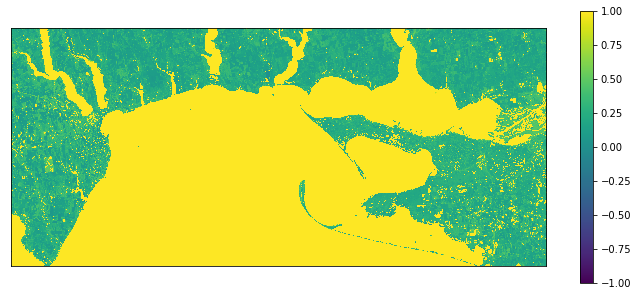

In [0]:
#Show NDWI
plt.figure( figsize= (12,5))
plt.imshow(ndwi, vmin = -1, vmax = 1)
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()

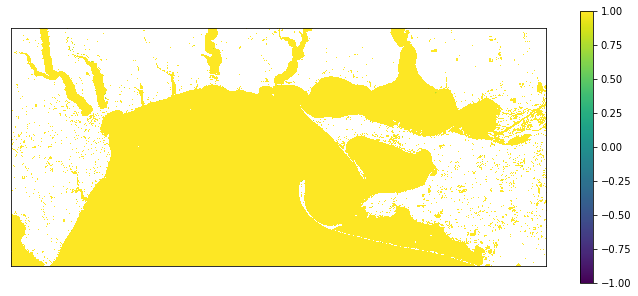

In [0]:
#Find Correct NDWI value to delinieate wterbodies
ndwi_masked = ndwi.copy()

mask = ndwi<0.75

ndwi_masked[mask] = np.nan
plt.figure( figsize= (12,5))
plt.imshow(ndwi_masked, vmin = -1, vmax = 1)
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()

In [0]:
b2_masked = b2_equal.copy()
b2_masked = b2_masked.astype('float64')

In [0]:
b2_masked[mask] = np.nan

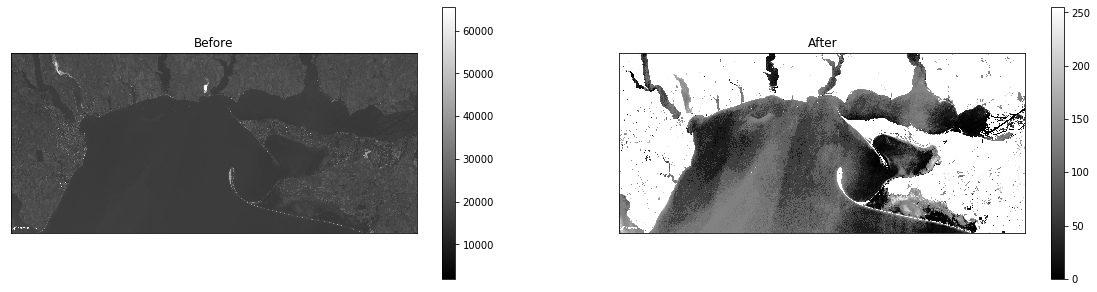

In [0]:
#apply this mask to B2 equalized
plt.figure( figsize= (20,5))
plt.subplot(1,2,1)
plt.title('Before')
plt.imshow(b2, vmin = np.min(b2), vmax = np.max(b2), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.subplot(1,2,2)
plt.title('After')
plt.imshow(b2_masked, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()

In [0]:
#Import RGB Image
#Use upload snippet
rgb = cv2.imread('2019-08-23, Sentinel-2B L1C, RGB, 8bit.tif', -1)

In [0]:
rgb.shape

(1303, 2935, 4)

In [0]:
rgb = np.stack((rgb[:,:,2], rgb[:,:,1], rgb[:,:,0]), axis = -1)

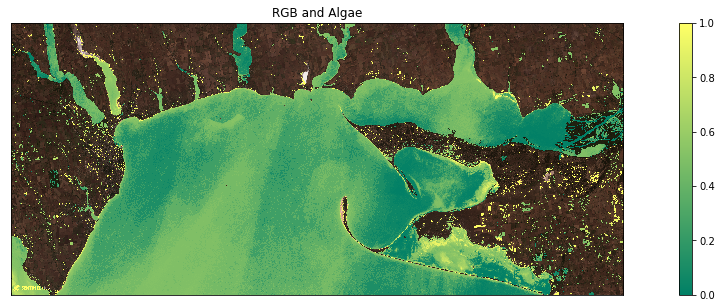

In [0]:
#Show RGB And Algae Image
#Check for Colormaps https://matplotlib.org/3.1.3/tutorials/colors/colormaps.html


plt.figure( figsize= (20,5))

plt.title('RGB and Algae')
plt.imshow(rgb)
plt.imshow(b2_masked/255, cmap='summer')
plt.xticks([])
plt.yticks([])
plt.colorbar()
# plt.savefig("algae.png")
# files.download("algae.png") 
plt.show()

#to download image to local machine uncomment 2 lines above